In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline


def plot_ci_manual(t, s_err, n, x, x2, y2, col, ax):
    """Return an axes of confidence bands using a simple approach.

    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    """

    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, color=col, alpha=0.2)

# Modeling with Numpy
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b) 
window_size = [10,20,30,40,50,60]
feature_selection_size = ['05',10,15,20,25,50,75,100,125,150,175,200,225]
methods = ['LinearRegression', 'DecisionTreeRegressor', 'KNeighborsRegressor', 'MLPRegressor', 'svr']
vehicle = 'camion_'
base_string = '../Results/window_exploration/y_t_p_'
colors = ['C0', 'C1', 'C2', 'C3', 'C4']

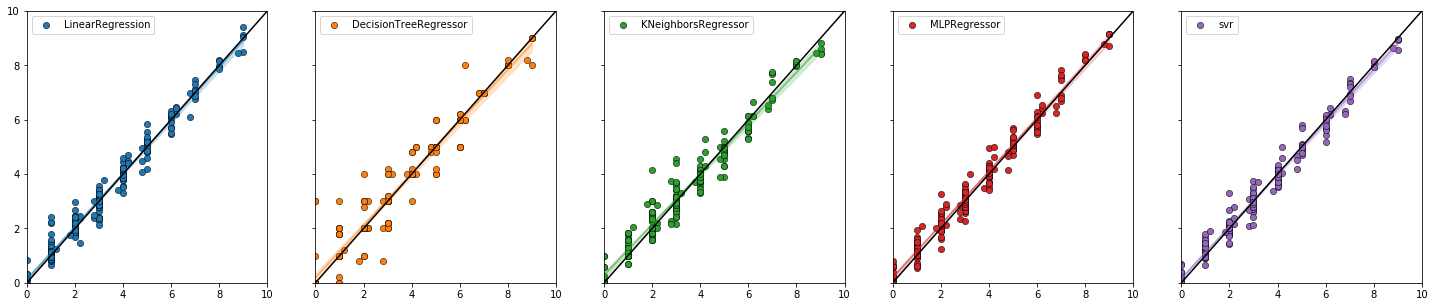

In [34]:
vehicle = 'camion_'
fig, ax = plt.subplots(1, 5, figsize= (25,5),sharey=True)
base_string = '../Results/window_exploration/y_t_p_'

for i,algorithm in enumerate(methods):
    dataset = pd.read_csv(base_string+vehicle+algorithm+'_'+str(window_size[5])+'.csv')
    d_int = np.round(np.asarray(dataset.values))
    d_float = (np.asarray(dataset.values))
    x = d_float[:,1]
    y = d_float[:,2]
    ax[i].scatter(x,y, label=algorithm,c=colors[i],s=40, edgecolor='k',linewidths =0.5)
    p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
    y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

    # Statistics
    n = y.size                                           # number of observations
    m = p.size                                                 # number of parameters
    dof = n - m                                                # degrees of freedom
    t = stats.t.ppf(0.995, n - m)                              # used for CI and PI bands
    
    x2 = np.linspace(np.min(x), np.max(x), 100)
    y2 = equation(p, x2)

    # Estimates of Error in Data/Model
    resid = y - y_model                           
    chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
    chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
    s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error
    ax[i].plot(x, y_model, color=colors[i], linewidth=1.5, alpha=0.5)  
    plot_ci_manual(t, s_err, n, x, x2, y2, colors[i], ax[i])

    ax[i].plot([0,10],[0,10], color = 'k')
    ax[i].axis([0,10,0,10])
    ax[i].legend()
plt.savefig(vehicle+'60_seconds.png')

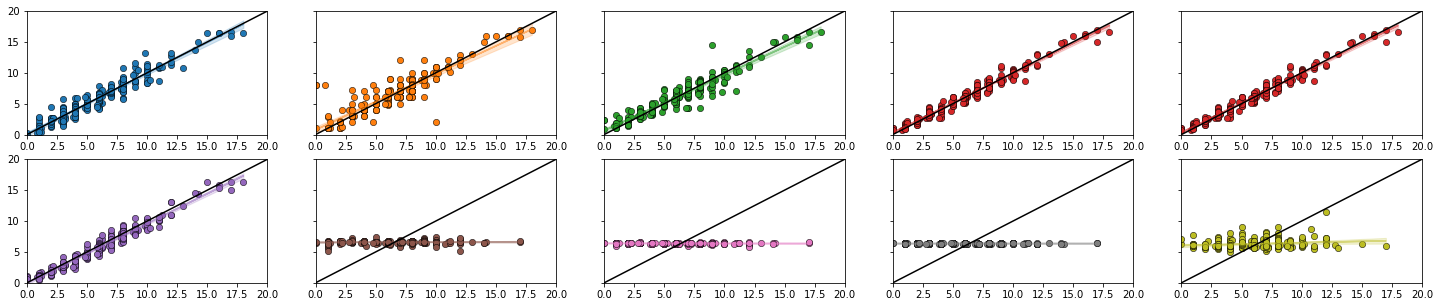

In [32]:
vehicle = 'car_'
fig, ax = plt.subplots(2, 5, figsize= (25,5),sharey=True)
base_string = '../Results/window_exploration/y_t_p_'
methods = ['LinearRegression', 'DecisionTreeRegressor', 'KNeighborsRegressor', 'svr', 'svr', 'MLPRegressor', 'srnn', 'gru', 'lstm', 'TCN']
colors = ['C0', 'C1', 'C2', 'C3', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

for i,algorithm in enumerate(methods):
    dataset = pd.read_csv(base_string+vehicle+algorithm+'_'+str(window_size[5])+'.csv')
    d_int = np.round(np.asarray(dataset.values))
    d_float = (np.asarray(dataset.values))
    x = d_float[:,1]
    y = d_float[:,2]
    ax[i//5,i%5].scatter(x,y, label=algorithm,c=colors[i],s=40, edgecolor='k',linewidths =0.5)
    p, cov = np.polyfit(x, y, 1, cov=True)                     # parameters and covariance from of the fit of 1-D polynom.
    y_model = equation(p, x)                                   # model using the fit parameters; NOTE: parameters here are coefficients

    # Statistics
    n = y.size                                           # number of observations
    m = p.size                                                 # number of parameters
    dof = n - m                                                # degrees of freedom
    t = stats.t.ppf(0.995, n - m)                              # used for CI and PI bands
    
    x2 = np.linspace(np.min(x), np.max(x), 100)
    y2 = equation(p, x2)

    # Estimates of Error in Data/Model
    resid = y - y_model                           
    chi2 = np.sum((resid / y_model)**2)                        # chi-squared; estimates error in data
    chi2_red = chi2 / dof                                      # reduced chi-squared; measures goodness of fit
    s_err = np.sqrt(np.sum(resid**2) / dof)                    # standard deviation of the error
    ax[i//5,i%5].plot(x, y_model, color=colors[i], linewidth=1.5, alpha=0.5)  
    plot_ci_manual(t, s_err, n, x, x2, y2, colors[i], ax[i//5,i%5])

    ax[i//5,i%5].plot([0,20],[0,20], color = 'k')
    ax[i//5,i%5].axis([0,20,0,20])
    #ax[i//5,i%5].legend()
plt.savefig(vehicle+'60_seconds.png')

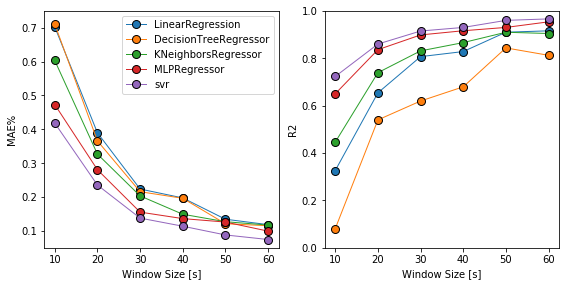

In [25]:
vehicle = 'car_'
fig, ax = plt.subplots(1, 2, figsize=(8,4))
fig.tight_layout(pad=1.5)
base_string = '../Results/window_exploration/y_t_p_'
for i,algorithm in enumerate(methods):
    mae_method = []
    r2_method = []
    for j,win in enumerate(window_size):
        dataset = pd.read_csv(base_string+vehicle+algorithm+'_'+str(window_size[j])+'.csv')
        d_int = np.round(np.asarray(dataset.values))
        d_float = (np.asarray(dataset.values))
        x = d_float[:,1]
        y = d_float[:,2]
        mae = mean_absolute_error(x, y)
        mae_method.append(mae/np.mean(y))
        r2= r2_score(x, y)
        r2_method.append(r2)
    ax[0].plot([10,20,30,40,50,60], mae_method, marker = 'o', markersize = '8',  markeredgecolor = 'k',linewidth = '1', label = algorithm)
    ax[1].plot([10,20,30,40,50,60], r2_method, marker = 'o', markersize = '8',  markeredgecolor = 'k',linewidth = '1', label = algorithm)
ax[0].legend()
ax[0].set_ylabel('MAE%')
ax[1].set_ylabel('R2')
ax[0].set_xlabel('Window Size [s]')
ax[1].set_xlabel('Window Size [s]')
ax[0].set_ylim([0.05,0.75])
ax[1].set_ylim([0.0,1.0])
plt.savefig(vehicle+'window_regression.png')
plt.show()

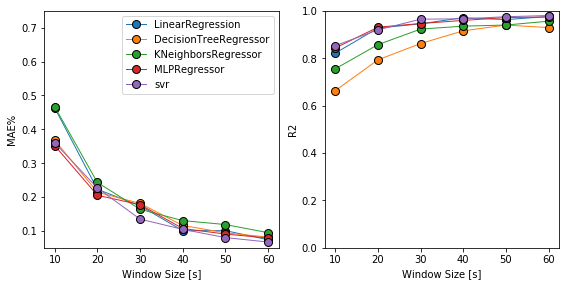

In [26]:
vehicle = 'camion_'
fig, ax = plt.subplots(1, 2, figsize=(8,4))
fig.tight_layout(pad=1.5)
base_string = '../Results/window_exploration/y_t_p_'
for i,algorithm in enumerate(methods):
    mae_method = []
    r2_method = []
    for j,win in enumerate(window_size):
        dataset = pd.read_csv(base_string+vehicle+algorithm+'_'+str(window_size[j])+'.csv')
        d_int = np.round(np.asarray(dataset.values))
        d_float = (np.asarray(dataset.values))
        x = d_float[:,1]
        y = d_float[:,2]
        mae = mean_absolute_error(x, y)
        mae_method.append(mae/np.mean(y))
        r2= r2_score(x, y)
        r2_method.append(r2)
    ax[0].plot([10,20,30,40,50,60], mae_method, marker = 'o', markersize = '8',  markeredgecolor = 'k',linewidth = '1', label = algorithm)
    ax[1].plot([10,20,30,40,50,60], r2_method, marker = 'o', markersize = '8',  markeredgecolor = 'k',linewidth = '1', label = algorithm)
ax[0].legend()
ax[0].set_ylabel('MAE%')
ax[1].set_ylabel('R2')
ax[0].set_xlabel('Window Size [s]')
ax[1].set_xlabel('Window Size [s]')
ax[0].set_ylim([0.05,0.75])
ax[1].set_ylim([0.0,1.0])
plt.savefig(vehicle+'window_regression.png')
plt.show()

FileNotFoundError: [Errno 2] File b'../Results/window_exploration/y_t_p_camion_srnn_60.csv' does not exist: b'../Results/window_exploration/y_t_p_camion_srnn_60.csv'

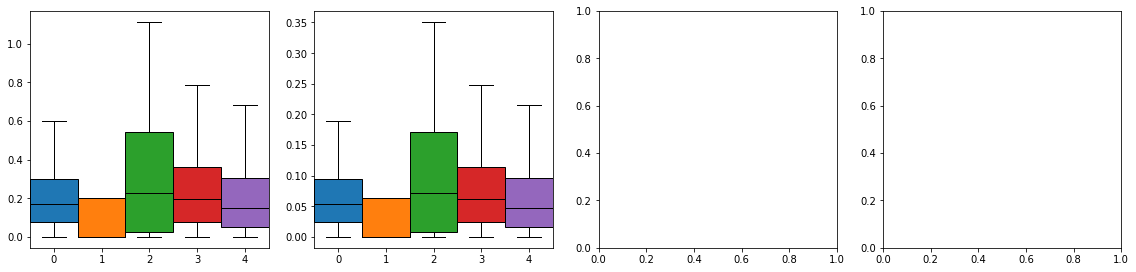

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
fig.tight_layout(pad=1.5)
vehicle = 'camion_'
base_string = '../Results/window_exploration/y_t_p_'
methods = ['LinearRegression', 'DecisionTreeRegressor', 'KNeighborsRegressor', 'MLPRegressor', 'svr', 'srnn', 'gru', 'lstm', 'TCN']
names = ['LR', 'DT', 'k-NN', 'SVR', 'MLP', 'RNN', 'GRU', 'LSTM', 'TCN']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
boxplt_list = []
for i,algorithm in enumerate(methods):
    dataset = pd.read_csv(base_string+vehicle+algorithm+'_'+str(window_size[5])+'.csv')
    d_int = np.round(np.asarray(dataset.values))
    d_float = (np.asarray(dataset.values))
    x = d_float[:,1]
    y = d_float[:,2]
    boxplt = ax[0].boxplot([np.abs(x-y)], positions = [i], widths=1,vert=True, patch_artist=True, showfliers = False)
    boxplt_list.append(boxplt)
    for patch in (boxplt['boxes']):
        patch.set_facecolor(colors[i])
    boxplt = ax[1].boxplot([np.abs(x-y)/np.mean(x)], positions = [i], widths=1,vert=True, patch_artist=True, showfliers = False)
    for patch in (boxplt['boxes']):
        patch.set_facecolor(colors[i])
    for line in ax[0].get_lines():
        line.set_color('k')
    for line in ax[1].get_lines():
        line.set_color('k')
#ax[0].legend([boxplt_list[0]["boxes"][0], boxplt_list[1]["boxes"][0], boxplt_list[2]["boxes"][0], boxplt_list[3]["boxes"][0], boxplt_list[4]["boxes"][0], boxplt_list[5]["boxes"][0], boxplt_list[6]["boxes"][0], boxplt_list[7]["boxes"][0], boxplt_list[8]["boxes"][0]], names, ncol=2)#, loc='upper right')
ax[0].set_ylabel('MAE')
ax[1].set_ylabel('MAE%')
ax[0].set_ylim([-0.05,5])
ax[1].set_ylim([-0.01,1.4])


vehicle = 'car_'
boxplt_list = []
for i,algorithm in enumerate(methods):
    dataset = pd.read_csv(base_string+vehicle+algorithm+'_'+str(window_size[5])+'.csv')
    d_int = np.round(np.asarray(dataset.values))
    d_float = (np.asarray(dataset.values))
    x = d_float[:,1]
    y = d_float[:,2]
    boxplt = ax[2].boxplot([np.abs(x-y)], positions = [i], widths=1,vert=True, patch_artist=True, showfliers = False)
    boxplt_list.append(boxplt)
    for patch in (boxplt['boxes']):
        patch.set_facecolor(colors[i])
    boxplt = ax[3].boxplot([np.abs(x-y)/np.mean(x)], positions = [i], widths=1,vert=True, patch_artist=True, showfliers = False)
    for patch in (boxplt['boxes']):
        patch.set_facecolor(colors[i])
    for line in ax[2].get_lines():
        line.set_color('k')
    for line in ax[3].get_lines():
        line.set_color('k')
#ax[0].legend([boxplt_list[0]["boxes"][0], boxplt_list[1]["boxes"][0], boxplt_list[2]["boxes"][0], boxplt_list[3]["boxes"][0], boxplt_list[4]["boxes"][0], boxplt_list[5]["boxes"][0], boxplt_list[6]["boxes"][0], boxplt_list[7]["boxes"][0], boxplt_list[8]["boxes"][0]], names, ncol=2)#, loc='upper right')
ax[2].set_ylabel('MAE')
ax[3].set_ylabel('MAE%')
ax[2].set_ylim([-0.05,5])
ax[3].set_ylim([-0.01,1.4])
plt.savefig(vehicle+'MAE_60_seconds.png')

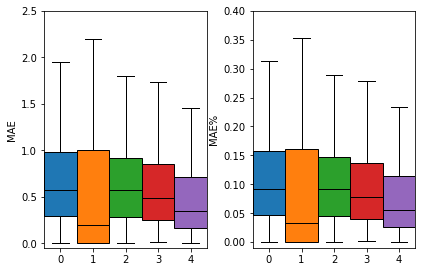

In [36]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout(pad=1.5)
vehicle = 'car_'
base_string = '../Results/window_exploration/y_t_p_'
boxplt_list = []
for i,algorithm in enumerate(methods):
    dataset = pd.read_csv(base_string+vehicle+algorithm+'_'+str(window_size[5])+'.csv')
    d_int = np.round(np.asarray(dataset.values))
    d_float = (np.asarray(dataset.values))
    x = d_float[:,1]
    y = d_float[:,2]
    boxplt = ax[0].boxplot([np.abs(x-y)], positions = [i], widths=1,vert=True, patch_artist=True, showfliers = False)
    boxplt_list.append(boxplt)
    for patch in (boxplt['boxes']):
        patch.set_facecolor(colors[i])
    boxplt = ax[1].boxplot([np.abs(x-y)/np.mean(x)], positions = [i], widths=1,vert=True, patch_artist=True, showfliers = False)
    for patch in (boxplt['boxes']):
        patch.set_facecolor(colors[i])
    for line in ax[0].get_lines():
        line.set_color('k')
    for line in ax[1].get_lines():
        line.set_color('k')
#ax[0].legend([boxplt_list[0]["boxes"][0], boxplt_list[1]["boxes"][0], boxplt_list[2]["boxes"][0], boxplt_list[3]["boxes"][0], boxplt_list[4]["boxes"][0]], methods)#, loc='upper right')
ax[0].set_ylabel('MAE')
ax[1].set_ylabel('MAE%')
ax[0].set_ylim([-0.05,2.5])
ax[1].set_ylim([-0.01,0.4])
plt.savefig(vehicle+'MAE_60_seconds.png')

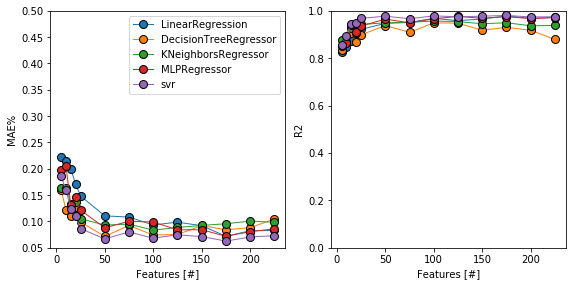

In [28]:
vehicle = 'camion_'
base_string = '../Results/feature_selection/y_t_p_'
fig, ax = plt.subplots(1, 2, figsize=(8,4))
fig.tight_layout(pad=1.5)
for i,algorithm in enumerate(methods):
    mae_method = []
    r2_method = []
    for j,feat in enumerate(feature_selection_size):
        dataset = pd.read_csv(base_string+vehicle+algorithm+'_'+str(window_size[5])+'_'+str(feat)+'.csv')
        d_int = np.round(np.asarray(dataset.values))
        d_float = (np.asarray(dataset.values))
        x = d_float[:,1]
        y = d_float[:,2]
        mae = mean_absolute_error(x, y)
        mae_method.append(mae/np.mean(y))
        r2= r2_score(x, y)
        r2_method.append(r2)
    ax[0].plot(np.asarray([5,10,15,20,25,50,75,100,125,150,175,200,225]), mae_method, marker = 'o', markersize = '8',  markeredgecolor = 'k',linewidth = '1', label = algorithm)
    ax[1].plot(np.asarray([5,10,15,20,25,50,75,100,125,150,175,200,225]), r2_method, marker = 'o', markersize = '8',  markeredgecolor = 'k',linewidth = '1', label = algorithm)
ax[0].legend()
ax[0].set_ylabel('MAE%')
ax[1].set_ylabel('R2')
ax[0].set_xlabel('Features [#]')
ax[1].set_xlabel('Features [#]')
ax[0].set_ylim([0.05,0.5])
ax[1].set_ylim([0.0,1.0])
plt.savefig(vehicle+'feature_selection.png')
plt.show()

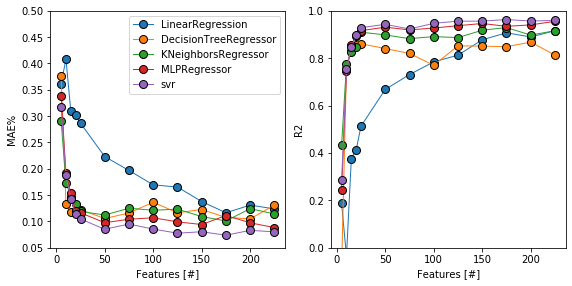

In [29]:
vehicle = 'car_'
base_string = '../Results/feature_selection/y_t_p_'
fig, ax = plt.subplots(1, 2, figsize=(8,4))
fig.tight_layout(pad=1.5)
for i,algorithm in enumerate(methods):
    mae_method = []
    r2_method = []
    for j,feat in enumerate(feature_selection_size):
        dataset = pd.read_csv(base_string+vehicle+algorithm+'_'+str(window_size[5])+'_'+str(feat)+'.csv')
        d_int = np.round(np.asarray(dataset.values))
        d_float = (np.asarray(dataset.values))
        x = d_float[:,1]
        y = d_float[:,2]
        mae = mean_absolute_error(x, y)
        mae_method.append(mae/np.mean(y))
        r2= r2_score(x, y)
        r2_method.append(r2)
    ax[0].plot(np.asarray([5,10,15,20,25,50,75,100,125,150,175,200,225]), mae_method, marker = 'o', markersize = '8',  markeredgecolor = 'k',linewidth = '1', label = algorithm)
    ax[1].plot(np.asarray([5,10,15,20,25,50,75,100,125,150,175,200,225]), r2_method, marker = 'o', markersize = '8',  markeredgecolor = 'k',linewidth = '1', label = algorithm)
ax[0].legend()
ax[0].set_ylabel('MAE%')
ax[1].set_ylabel('R2')
ax[0].set_xlabel('Features [#]')
ax[1].set_xlabel('Features [#]')
ax[0].set_ylim([0.05,0.5])
ax[1].set_ylim([0.0,1.0])
plt.savefig(vehicle+'feature_selection.png')
plt.show()

In [20]:
vehicle = 'camion_'
base_string = '../Results/window_exploration/y_t_p_'
for i,algorithm in enumerate(methods):
    dataset = pd.read_csv(base_string+vehicle+algorithm+'_'+str(window_size[5])+'.csv')
    d_int = np.round(np.asarray(dataset.values))
    d_float = (np.asarray(dataset.values))
    x = d_float[:,1]
    y = d_float[:,2]
    mae = mean_absolute_error(x, y)
    mae_p = (mae/np.mean(y))
    print('{} MAE {} MAE% {}'.format(algorithm, mae, mae_p))
vehicle = 'car_'
base_string = '../Results/y_t_p_'
methods_DL = ['gru']

for i,algorithm in enumerate(methods_DL):
    dataset = pd.read_csv(base_string+algorithm+'_'+vehicle+'2_10'+'.csv')
    d_int = np.round(np.asarray(dataset.values))
    d_float = (np.asarray(dataset.values))
    x = d_float[:,1]
    y = d_float[:,2]
    mae = mean_absolute_error(x, y)
    mae_p = (mae/np.mean(y))
    print('{} MAE {} MAE% {}'.format(algorithm, mae, mae_p))

LinearRegression MAE 0.2370633381000108 MAE% 0.07376462043933632
DecisionTreeRegressor MAE 0.262780269058296 MAE% 0.08152476349471341
KNeighborsRegressor MAE 0.3062139654067905 MAE% 0.09467221231927113
MLPRegressor MAE 0.25925762101760436 MAE% 0.07892028031852477
svr MAE 0.21399663328527072 MAE% 0.0670134967752757
gru MAE 2.7393813663676965 MAE% 0.4461018088585011


Algorithm LinearRegression, features: 05 MAE 0.2926439254965355
Algorithm LinearRegression, features: 10 MAE 0.36364450194513265
Algorithm LinearRegression, features: 15 MAE 0.2673324774507449
Algorithm LinearRegression, features: 20 MAE 0.23983376961085318
Algorithm LinearRegression, features: 25 MAE 0.23270215555467572
Algorithm LinearRegression, features: 50 MAE 0.20335201486660293
Algorithm LinearRegression, features: 75 MAE 0.16000979352822062
Algorithm LinearRegression, features: 100 MAE 0.12919792656453022
Algorithm LinearRegression, features: 125 MAE 0.1236902217943505
Algorithm LinearRegression, features: 150 MAE 0.10272515973867127
Algorithm LinearRegression, features: 175 MAE 0.09458452926974006
Algorithm LinearRegression, features: 200 MAE 0.10654604786517213
Algorithm LinearRegression, features: 225 MAE 0.1002755536075927
Algorithm DecisionTreeRegressor, features: 05 MAE 0.2016882725354236
Algorithm DecisionTreeRegressor, features: 10 MAE 0.03250255064859353
Algorithm Deci

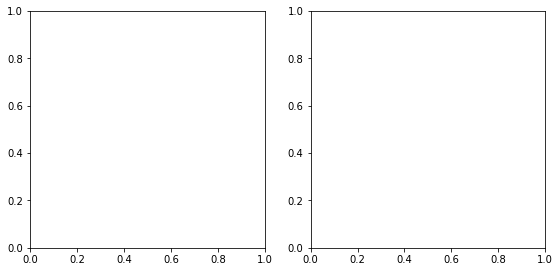

In [3]:
vehicle = 'car_'
base_string = '../Results/feature_selection/y_t_p_'
fig, ax = plt.subplots(1, 2, figsize=(8,4))
fig.tight_layout(pad=1.5)
for i,algorithm in enumerate(methods):
    mae_method = []
    r2_method = []
    for j,feat in enumerate(feature_selection_size):
        dataset = pd.read_csv(base_string+vehicle+algorithm+'_'+str(window_size[5])+'_'+str(feat)+'.csv')
        d_int = np.round(np.asarray(dataset.values))
        d_float = (np.asarray(dataset.values))
        x = d_float[:,1]
        y = d_float[:,2]
        mae = np.median(np.abs(x-y))
        mae_method.append(mae/np.mean(y))
        r2= r2_score(x, y)
        r2_method.append(r2)
        print('Algorithm {}, features: {} MAE {}'.format(algorithm, feat,mae_method[-1]))
    

Algorithm LinearRegression, features: 225 MAE 0.09190057762292128
Algorithm DecisionTreeRegressor, features: 225 MAE 0.03119753777280347
Algorithm KNeighborsRegressor, features: 225 MAE 0.09110035337132585
Algorithm MLPRegressor, features: 225 MAE 0.08132166747337138
Algorithm svr, features: 225 MAE 0.05445751505431142


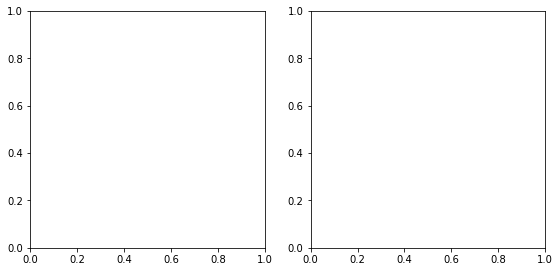

In [9]:
vehicle = 'car_'
base_string = '../Results/window_exploration/y_t_p_'
fig, ax = plt.subplots(1, 2, figsize=(8,4))
fig.tight_layout(pad=1.5)
for i,algorithm in enumerate(methods):
    mae_method = []
    r2_method = []
    dataset = pd.read_csv(base_string+vehicle+algorithm+'_'+str(window_size[5])+'.csv')
    d_int = np.round(np.asarray(dataset.values))
    d_float = (np.asarray(dataset.values))
    x = d_float[:,1]
    y = d_float[:,2]
    mae = np.median(np.abs(x-y))
    mae_method.append(mae/np.mean(y))
    r2= r2_score(x, y)
    r2_method.append(r2)
    print('Algorithm {}, features: {} MAE {}'.format(algorithm, feat,mae_method[-1]))
    

In [20]:
vehicle = 'car_'
base_string = '../Results/deep_learning/y_t_p_'
methods_DL = ['gru', 'lstm', 'srnn']
layers = ['', '2_']
neurons = ['10', '50', '100']
for i,algorithm in enumerate(methods_DL):
    for i,layer in enumerate(layers):
        for i,neur in enumerate(neurons):
            dataset = pd.read_csv(base_string+algorithm+'_'+vehicle+layer+neur+'.csv')
            d_int = np.round(np.asarray(dataset.values))
            d_float = (np.asarray(dataset.values))
            x = d_float[:,1]
            y = d_float[:,2]
            mae = mean_absolute_error(x, y)
            mae_p = (mae/np.mean(y))
            print('{} MAE {} MAE% {}'.format(algorithm+'_'+vehicle+layer+'_'+neur, mae, mae_p))
vehicle = 'car_'
base_string = '../Results/deep_learning/y_t_p_'
methods_DL = ['TCN']
for z,algorithm in enumerate(methods_DL):
    for i in np.arange(1,9):
        dataset = pd.read_csv(base_string+algorithm+'_'+vehicle+'0'+str(i)+'.csv')
        d_int = np.round(np.asarray(dataset.values))
        d_float = (np.asarray(dataset.values))
        x = d_float[:,1]
        y = d_float[:,2]
        mae = mean_absolute_error(x, y)
        mae_p = (mae/np.mean(y))
        print('{} MAE {} MAE% {}'.format(algorithm+'_'+str(i), mae, mae_p))

gru_car__10 MAE 2.741122053811641 MAE% 0.4471244180585617
gru_car__50 MAE 2.76930085426007 MAE% 0.4341499309494368
gru_car__100 MAE 2.769742704932716 MAE% 0.43441311255851284
gru_car_2__10 MAE 2.7393813663676965 MAE% 0.4461018088585011
gru_car_2__50 MAE 2.7730430031389934 MAE% 0.4302620644181167
gru_car_2__100 MAE 2.765500129147963 MAE% 0.43428447391260844
lstm_car__10 MAE 2.7382204286995346 MAE% 0.4476012456455865
lstm_car__50 MAE 2.7639739076232988 MAE% 0.434364110731463
lstm_car__100 MAE 2.758991130044823 MAE% 0.436539494770283
lstm_car_2__10 MAE 2.739549454260072 MAE% 0.44598458177329525
lstm_car_2__50 MAE 2.764279995964106 MAE% 0.4335308257559933
lstm_car_2__100 MAE 2.7583751717488596 MAE% 0.4362625354639213
srnn_car__10 MAE 2.7505434497757673 MAE% 0.4464896943652636
srnn_car__50 MAE 2.764034233183837 MAE% 0.435476203428436
srnn_car__100 MAE 2.760829080717469 MAE% 0.43351356425809495
srnn_car_2__10 MAE 2.7452476650224042 MAE% 0.4443270536584115
srnn_car_2__50 MAE 2.777376172645720

In [8]:
import pandas as pd
data = pd.read_csv('features_rank.csv')
data.sort_values(by=['f_score.1'], ascending=False)[:25]

,Unnamed: 0,features,f_score,f_score.1
149,149,z10D41_min,0.015382,0.901325
59,59,z10S42_median_f,0.015520,0.900884
227,227,z10S42_mean_f,0.029115,0.864553
46,46,y10D42_median_f,0.029515,0.863635
221,221,z10S40_mean_f,0.067537,0.795018
249,249,x10S43_elem_over_mean,0.076941,0.781551
100,100,y10S42_root_mean_square,0.092364,0.761264
79,79,y10S42_abs_abs_energy,0.092742,0.760792
158,158,z10S40_min,0.095524,0.757342
187,187,y10S43_kurtuisi,0.111412,0.738621


In [2]:
data

,Unnamed: 0,features,f_score,f_score.1
0,0,x10D41_median_abs_deviation,9.019265,2.746322e-03
1,1,y10D41_median_abs_deviation,2.808265,9.413140e-02
2,2,z10D41_median_abs_deviation,28.647823,1.105347e-07
3,3,x10D42_median_abs_deviation,7.932151,4.963923e-03
4,4,y10D42_median_abs_deviation,167.576079,3.073276e-35
5,5,z10D42_median_abs_deviation,74.346854,2.974487e-17
6,6,x10D43_median_abs_deviation,5.805138,1.618176e-02
7,7,y10D43_median_abs_deviation,52.344410,1.005754e-12
8,8,z10D43_median_abs_deviation,67.909356,6.101505e-16
9,9,x10S40_median_abs_deviation,17.266668,3.562088e-05
